# CA3  Capstone Project - Final
# Name: Denisse Garcia
# Student ID: SBS24050


### This is the part 1 of the project - Analisys, evaluation and study of Dataset 1

"www.kaggle.com. (n.d.). Customer Support Ticket Dataset. [online] Available at: https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset."



## 1.  **Importing Necessary Modules**

In [1]:
#Dependencies
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.sparse import hstack, csr_matrix
import warnings
warnings.filterwarnings("ignore")

## 2. **Data Understanding** 

In [2]:
# Import required libraries
import pandas as pd

# Load dataset
df = pd.read_csv('customer_support_tickets.csv')

# Preview the dataset
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
# Checking the Dimensions
df.shape

(8469, 17)

## 3. **Inspect Dataset Structure**

In [4]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
# Printing the data structure
print('Datatype in Each Column\n')
pd.DataFrame({
    'Datatype': df.dtypes, 
    'Unique Values': df.nunique(), 
    'Total Values': len(df)
}).rename_axis("Column Name")

Datatype in Each Column



,Datatype,Unique Values,Total Values
Column Name,,,
Ticket ID,int64,8469,8469
Customer Name,object,8028,8469
Customer Email,object,8320,8469
Customer Age,int64,53,8469
Customer Gender,object,3,8469
Product Purchased,object,42,8469
Date of Purchase,object,730,8469
Ticket Type,object,5,8469
Ticket Subject,object,16,8469


In [6]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Customer Satisfaction Rating    5700
Time to Resolution              5700
Resolution                      5700
First Response Time             2819
Ticket Description                 0
Ticket Channel                     0
Ticket Priority                    0
Ticket Status                      0
Ticket ID                          0
Customer Name                      0
Ticket Type                        0
Date of Purchase                   0
Product Purchased                  0
Customer Gender                    0
Customer Age                       0
Customer Email                     0
Ticket Subject                     0
dtype: int64

In [7]:
# Create a DataFrame from the missing value counts
missing_table = df.isnull().sum().sort_values(ascending=False).reset_index()
missing_table.columns = ['Column', 'Missing Values']

# Show the table
missing_table.style.background_gradient(cmap='viridis')

,Column,Missing Values
0,Customer Satisfaction Rating,5700
1,Time to Resolution,5700
2,Resolution,5700
3,First Response Time,2819
4,Ticket Description,0
5,Ticket Channel,0
6,Ticket Priority,0
7,Ticket Status,0
8,Ticket ID,0
9,Customer Name,0


In [8]:
# View basic statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticket ID,8469.0,4235.000000,2444.934048,1.0,2118.0,4235.0,6352.0,8469.0
Customer Age,8469.0,44.026804,15.296112,18.0,31.0,44.0,57.0,70.0
Customer Satisfaction Rating,2769.0,2.991333,1.407016,1.0,2.0,3.0,4.0,5.0


In [9]:
df['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

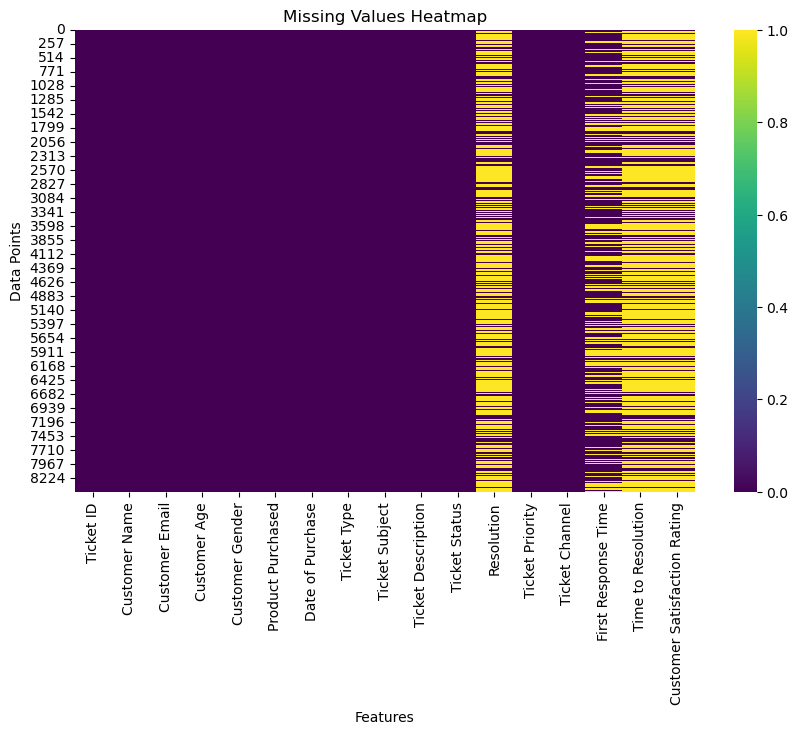

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull()

# Plotting missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

In [11]:
# Print the number of missing values for each column
missing_count = df.isnull().sum()
print("Number of missing values per column:")
print(missing_count)

Number of missing values per column:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


*It can be seen that Resolution, First Response Time, Time to Resolution and Customer Satisfaction Rating has missing values there.**

**The columns are showing values as missing because there are Nan values in those samples, Later we will impute them with suitable values**
For Customer Satisfaction Rating, consider imputation.

In [12]:
# General overview of all numeric features

df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


Descriptive statistics were used to summarize and explore the core characteristics of the dataset. These included:

- Central tendency measures (mean, median)
- Frequency counts of categorical features
- Distributions of satisfaction ratings and response/resolution times
- Breakdown of ticket volume by channel and priority

This helped uncover patterns in user behavior and service performance that informed model design and business recommendations.

# Exploratory Data Analysis

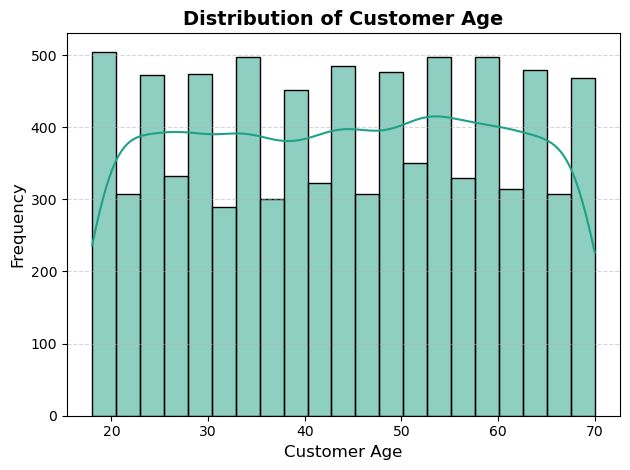

In [13]:
# Plot 1: Distribution of Customer Age

# Use viridis color pallete
sns.histplot(df['Customer Age'], kde=True, color=sns.color_palette("viridis")[3])

# Add titles and labels
plt.title('Distribution of Customer Age', fontsize=14, weight='bold')
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

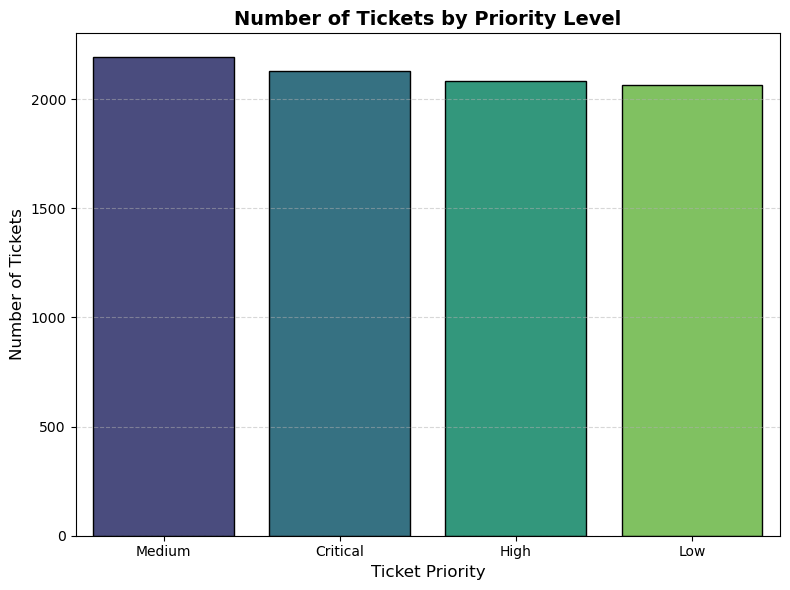

In [14]:
# Plot 2: Ticket Volume by Priority

# Set figure size
plt.figure(figsize=(8, 6))

# Sort priority levels by frequency (optional but more informative)
sorted_priorities = df['Ticket Priority'].value_counts().index

# Create countplot with Viridis palette
sns.countplot(
    x='Ticket Priority',
    data=df,
    order=sorted_priorities,
    palette=sns.color_palette("viridis", len(sorted_priorities)),
    edgecolor='black'
)

# Improve plot styling
plt.title('Number of Tickets by Priority Level', fontsize=14, weight='bold')
plt.xlabel('Ticket Priority', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


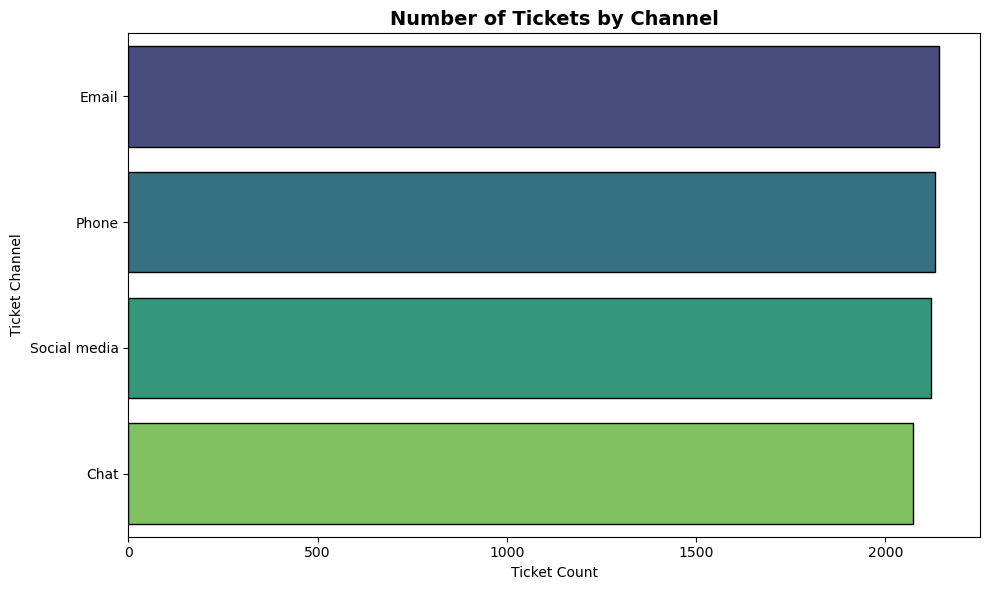

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get value counts
channel_counts = df['Ticket Channel'].value_counts()

# Step 2: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='Ticket Channel',
    order=channel_counts.index,
    palette=sns.color_palette("viridis", len(channel_counts)),
    edgecolor='black'
)

plt.title('Number of Tickets by Channel', fontsize=14, weight='bold')
plt.xlabel('Ticket Count')
plt.ylabel('Ticket Channel')
plt.tight_layout()
plt.show()


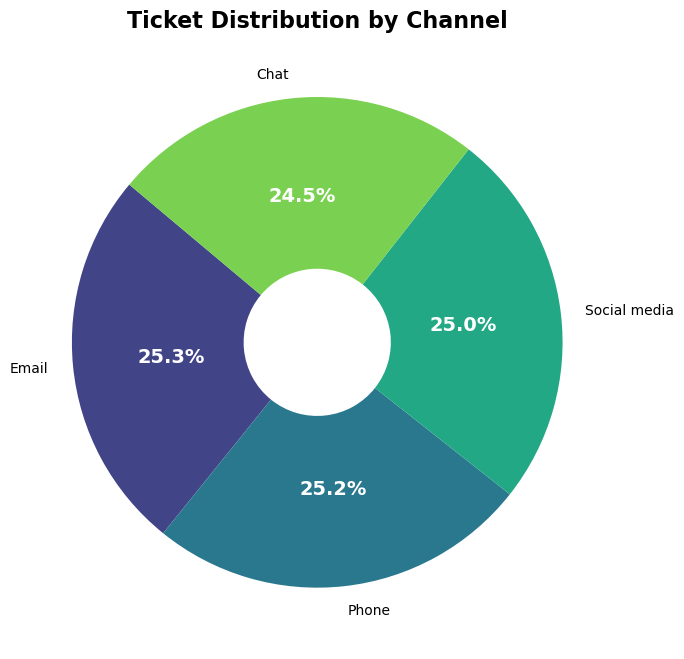

In [17]:
plt.figure(figsize=(7, 7))
colors = sns.color_palette("viridis", len(channel_counts))

wedges, texts, autotexts = plt.pie(
    channel_counts,
    labels=channel_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.7)
)

# Customize percentage text
for autotext in autotexts:
    autotext.set_color('white') 
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Ticket Distribution by Channel', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


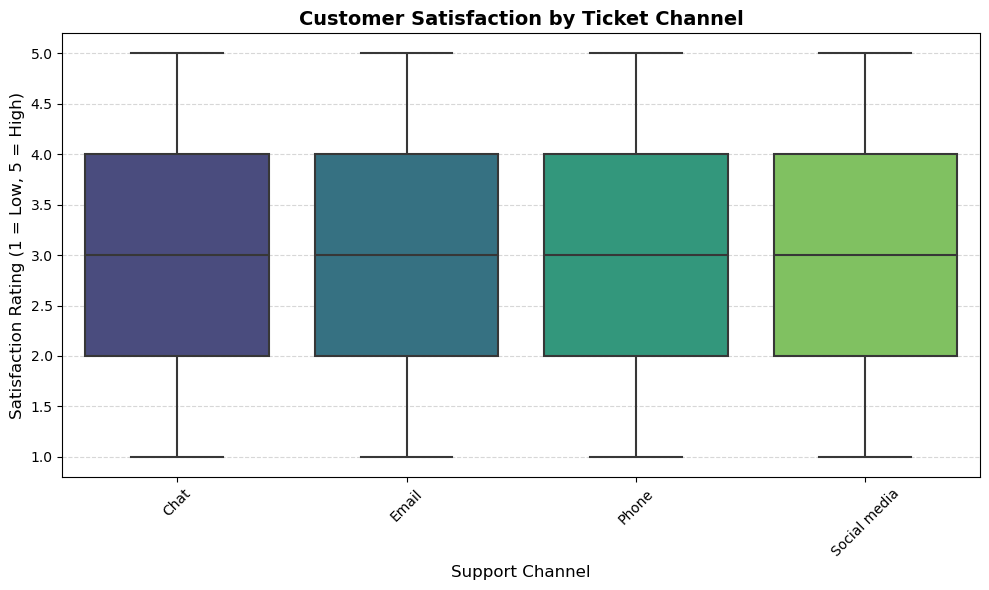

In [18]:
# Plot 3: Customer Satisfaction by Ticket Channel

plt.figure(figsize=(10, 6))

# Sort channels by median satisfaction rating for clearer comparison
sorted_channels = df.groupby('Ticket Channel')['Customer Satisfaction Rating'] \
                    .median().sort_values(ascending=False).index

# Boxplot with Viridis palette
sns.boxplot(
    x='Ticket Channel',
    y='Customer Satisfaction Rating',
    data=df,
    palette=sns.color_palette("viridis", df['Ticket Channel'].nunique()),
    order=sorted_channels,
    linewidth=1.5
)

# Enhanced aesthetics
plt.title('Customer Satisfaction by Ticket Channel', fontsize=14, weight='bold')
plt.xlabel('Support Channel', fontsize=12)
plt.ylabel('Satisfaction Rating (1 = Low, 5 = High)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Satisfaction Score Distribution

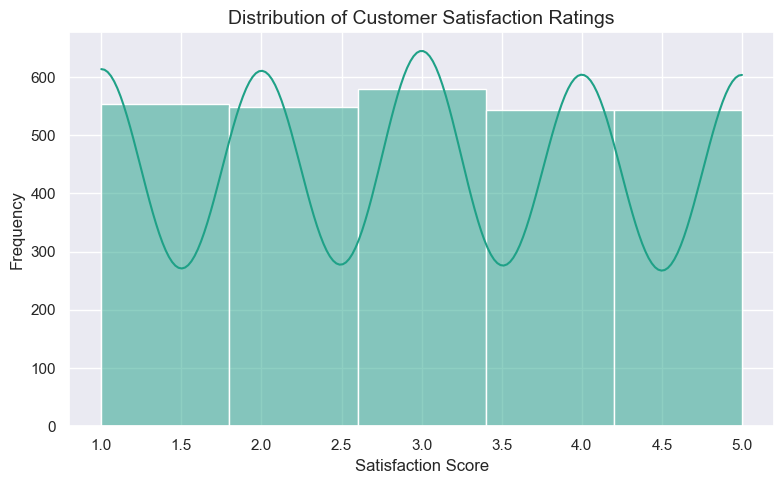

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style and use Viridis palette
sns.set(style="darkgrid")
viridis_color = sns.color_palette("viridis", as_cmap=True)

# Plot 1: Distribution of Customer Satisfaction Ratings using Viridis
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, color=sns.color_palette("viridis")[3])
plt.title('Distribution of Customer Satisfaction Ratings', fontsize=14)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Data Preprocessing & Feature Engineering 

First we remove columns that have too many unique values (like names or IDs) and are not helpful for our project, which makes the data cleaner and better for training models.

In [23]:
# drop high cordinality columns
data=df.drop(columns=['Ticket ID','Customer Name','Customer Email'],axis=1)

In [24]:
data.columns

Index(['Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [25]:
data['First Response Time']=data['First Response Time'].fillna(method='ffill')
data['Resolution']=data['Resolution'].fillna('no resolution provided')
data['Time to Resolution']=data['Time to Resolution'].fillna(method='ffill')

# Rationale

In this step, we cleaned missing values in three important columns to make the data better for analysis. For the `First Response Time` and `Time to Resolution` columns, we used a method called forward fill. This means we filled the missing values with the last known value from above. It works well because these are time-related columns. For the `Resolution` column, we added the text `"no resolution provided"` where the information was missing. This helps to show that some tickets were not resolved or not documented. This cleaning step helps the data stay complete and ready for machine learning.


In [26]:
data.isnull().sum().sort_values(ascending=False) #print and reorganize fields.

Customer Satisfaction Rating    5700
Time to Resolution                 2
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                         0
Ticket Priority                    0
Ticket Channel                     0
First Response Time                0
dtype: int64

Then we change date columns into real date format. this helps us work with time — like calculating how fast support answered or solved a problem. If a date is missing or wrong, it becomes empty instead of causing an error.

In [27]:
# convert date fileds to datetime
data['Date of Purchase']=pd.to_datetime(data['Date of Purchase'],errors='coerce')
data['First Response Time']=pd.to_datetime(data['First Response Time'],errors='coerce')
data['Time to Resolution']=pd.to_datetime(data['Time to Resolution'],errors='coerce')

In [28]:
# Separate known and unknown ratings
known = data[data['Customer Satisfaction Rating'].notnull()].copy()
unknown = data[data['Customer Satisfaction Rating'].isnull()].copy()

To prepare the dataset for modeling, we split it into two subsets based on the availability of 'customer satisfaction ratings'. The first subset, **known**, contains all records where the Customer Satisfaction Rating is present. This data will be used for training and evaluating our machine learning models. The second subset, **unknown**, includes entries where the satisfaction rating is missing. Once the model is trained, we'll use it to predict the ratings for this unlabeled subset. This separation ensures that the model learns only from valid labeled data while keeping prediction targets isolated.

In [29]:
# Get class proportions from known
class_counts = known['Customer Satisfaction Rating'].value_counts(normalize=True).sort_index()

#calculates the percentage of each satisfaction score (1 to 5) in the known data. 
#It helps us see how the ratings are distributed, and whether the data is balanced or not.

We proceed to calculate how many missing satisfaction scores should be filled with each rating (1 to 5), using the same distribution as in the known data. It helps keep the data balanced and realistic when we fill the unknown part.

In [30]:
# Determine how many to fill for each class
num_missing = unknown.shape[0]
fill_counts = (class_counts * num_missing).round().astype(int)

In [31]:
# Ensure total adds up to num_missing (fix rounding errors)
fill_diff = num_missing - fill_counts.sum()
if fill_diff != 0:
    fill_counts.iloc[0] += fill_diff

In [32]:
# Generate a list of values to fill
fill_values = []
for rating, count in fill_counts.items():
    fill_values.extend([rating] * count)

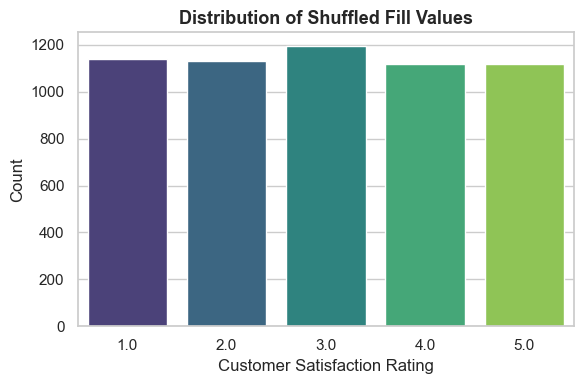

In [66]:
# Shuffle the fill values for randomness
np.random.shuffle(fill_values)

# Convert to pandas Series for easy plotting
fill_series = pd.Series(fill_values)

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=fill_series, palette='viridis')
plt.title("Distribution of Shuffled Fill Values", fontsize=13, weight='bold')
plt.xlabel("Customer Satisfaction Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [34]:
# Assign to missing values
unknown['Customer Satisfaction Rating'] = fill_values

In [35]:
# Combine back with known data
df_model = pd.concat([known, unknown], ignore_index=True)

# Optional: reset index
df_model.reset_index(drop=True, inplace=True)

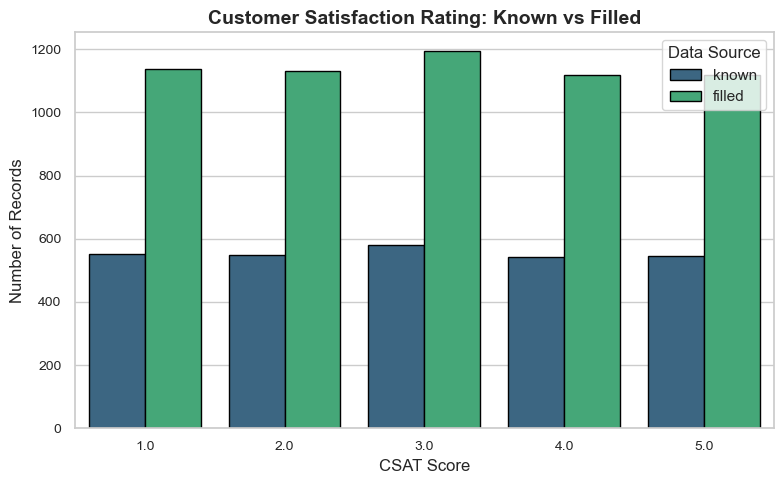

In [67]:
# Optional: Add a column to identify where each row came from
known['source'] = 'known'
unknown['source'] = 'filled'

# Combine both datasets
df_model = pd.concat([known, unknown], ignore_index=True)

# Reset index (optional, just for clean display)
df_model.reset_index(drop=True, inplace=True)

# Plot distribution of satisfaction ratings, colored by source
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_model,
    x='Customer Satisfaction Rating',
    hue='source',
    palette='viridis',
    edgecolor='black'
)

# Styling
plt.title("Customer Satisfaction Rating: Known vs Filled", fontsize=14, weight='bold')
plt.xlabel("CSAT Score", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Data Source")
plt.tight_layout()
plt.show()

In [36]:
df_model['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    1774
1.0    1691
2.0    1679
5.0    1664
4.0    1661
Name: count, dtype: int64

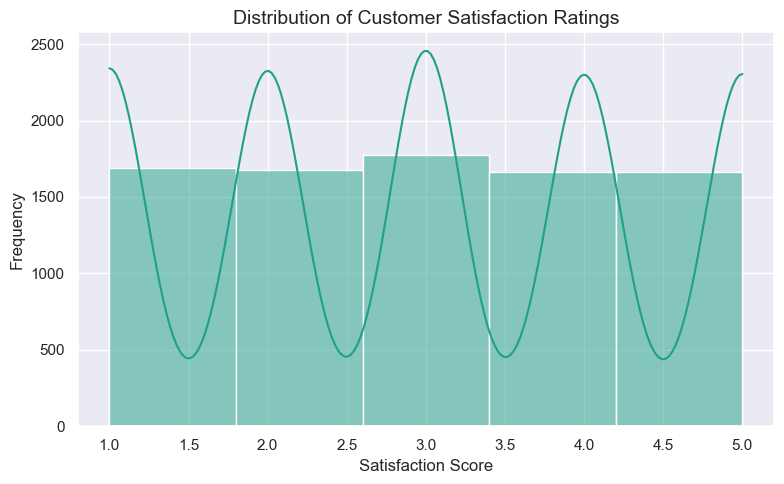

In [37]:
# Set aesthetic style and use Viridis palette
sns.set(style="darkgrid")
viridis_color = sns.color_palette("viridis", as_cmap=True)

# Plot 1: Distribution of Customer Satisfaction Ratings using Viridis
plt.figure(figsize=(8, 5))
sns.histplot(df_model['Customer Satisfaction Rating'], bins=5, kde=True, color=sns.color_palette("viridis")[3])
plt.title('Distribution of Customer Satisfaction Ratings', fontsize=14)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [38]:
df_model.isnull().sum().sort_values(ascending=False)

Time to Resolution              2
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Customer Satisfaction Rating    0
dtype: int64

In [39]:
df_model.shape

(8469, 14)

Proceed to change text columns (like gender or product type) into numbers by creating new columns for each category. This is needed because machine learning models cannot work directly with text. It also removes one category per column to keep the data simple and avoid confusion for the model.

In [40]:
# One-hot encode categorical columns
categorical_columns = ['Customer Gender','Product Purchased','Ticket Type','Ticket Status','Ticket Priority','Ticket Channel']
df_encoded = pd.get_dummies(df_model, columns=categorical_columns, drop_first=True)

In [41]:
# Prepare features and target
X_text_subject = df_encoded['Ticket Subject']
X_text_description = df_encoded['Ticket Description']
X_other = df_encoded.drop(columns=['Ticket Subject', 'Ticket Description', 'Customer Satisfaction Rating'])
y = df_encoded['Customer Satisfaction Rating'].astype(int)

In this step, we prepared the dataset by separating the input features and the target variable. We also split the data into text and non-text parts, because they need different processing before we can use them in a machine learning model.

* We saved the **"Ticket Subject"** and **"Ticket Description"** into two separate variables. These are **text columns**, and we will process them later using NLP techniques like **TF-IDF vectorization**.

* The rest of the data, which includes **numerical and categorical features**, was saved into another variable called `X_other`. These features are already in the right format for the model, so they can be used directly.

* Finally, we selected the column **"Customer Satisfaction Rating"** and saved it as `y`. This is the **target column** that the model will learn to predict.

We do this step to organize the data and make sure the model gets the right inputs and output. This helps avoid errors and makes it easier to process text and numbers correctly.


In [60]:
vectorizer = TfidfVectorizer(max_features=100)
X_subject_tfidf = vectorizer.fit_transform(X_text_subject)
X_description_tfidf = vectorizer.fit_transform(X_text_description)

we used TF-IDF vectorization to convert the text data into numbers so the model can understand it. Machine learning models cannot work directly with raw text, so we need to turn the words into a numeric format.

We used the TfidfVectorizer from scikit-learn. It changes the text into a matrix of numbers that shows how important each word is in the dataset.

we created the vectorizer with a limit of 100 features. This means it will keep only the 100 most important words.


In [61]:
# Combine all features
X_other_numeric = X_other.apply(pd.to_numeric, errors='coerce').fillna(0)
X_other_numeric = X_other_numeric.fillna(0)
# Force numeric matrix to float32 to ensure compatibility with sparse format
X_other_sparse = csr_matrix(X_other_numeric.values.astype('float32'))
X_combined = hstack([X_subject_tfidf, X_description_tfidf, X_other_sparse])

After processing the text and numeric data separately, we now combine everything into one matrix so it can be used to train a machine learning model.

1. First, we made sure all the values in X_other (the non-text features) are numeric. If there are missing values or non-numeric text, they are replaced with 0 to avoid errors.
2. We then converted the numeric data to float32 format to make sure it works well with the text data (which is in sparse format).
3. we combined everything into one feature set using hstack()

This creates a new matrix called X_combined which includes:

- The TF-IDF vector from ticket subject
- The TF-IDF vector from ticket description

- The numerical features (like gender, priority, etc.)

This step is important because it joins all the useful information (text + numbers) into one place so we can train a model using all available data.


In [65]:
# Find object columns and drop or fix them
print(X_other_numeric.select_dtypes(include='object').columns)

Index([], dtype='object')


In [63]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=100, stratify=y)

 we split the data into training and test sets using train_test_split(). We used stratify=y to make sure the satisfaction score distribution stayed balanced. This helps train the model on one part of the data and test it fairly on new data to measure performance.

 We used test_size=0.2 to keep 80% of the data for training and 20% for testing.Using 20% gives us enough test data to check model accuracy, and still keeps most data for training, so the model can learn well.

# **Model Training**

In [46]:
# Store metrics for visualization
results = {}

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    # Store metrics
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    # Print metrics
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Plot Confusion Matrix with plasma colormap
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="plasma",  #  Using plasma palette here
        xticklabels=[1, 2, 3, 4, 5],
        yticklabels=[1, 2, 3, 4, 5]
    )
    plt.title(f"{name} - Confusion Matrix", fontsize=12, weight='bold')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# **Ramdom Forest**


=== Random Forest ===
Accuracy: 0.2102
Precision: 0.2100
Recall: 0.2102
F1 Score: 0.2096

Classification Report:
              precision    recall  f1-score   support

           1       0.20      0.22      0.21       338
           2       0.19      0.19      0.19       336
           3       0.23      0.26      0.24       355
           4       0.22      0.19      0.20       332
           5       0.21      0.19      0.20       333

    accuracy                           0.21      1694
   macro avg       0.21      0.21      0.21      1694
weighted avg       0.21      0.21      0.21      1694



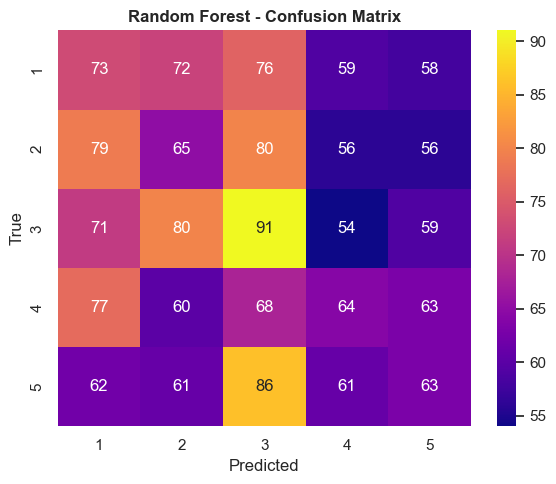

In [47]:

# Model: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model("Random Forest", y_test, y_pred_rf)

# **LightGBM**

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23745
[LightGBM] [Info] Number of data points in the train set: 6775, number of used features: 184
[LightGBM] [Info] Start training from score -1.610915
[LightGBM] [Info] Start training from score -1.618333
[LightGBM] [Info] Start training from score -1.563287
[LightGBM] [Info] Start training from score -1.628813
[LightGBM] [Info] Start training from score -1.627309

=== LightGBM ===
Accuracy: 0.2137
Precision: 0.2129
Recall: 0.2137
F1 Score: 0.2129

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.19      0.20       338
           2       0.18      0.17      0.18       336
           3       0.22      0.25      0.24       355
           4       0.23      0.24      0.23       332
           5       0.23      0.22      0.23       333

    a

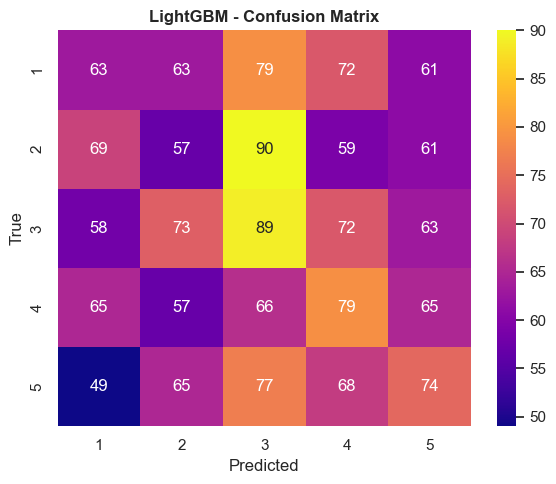

In [48]:
# Model: LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
evaluate_model("LightGBM", y_test, y_pred_lgbm)


# **Decision Tree**


=== Decision Tree ===
Accuracy: 0.2084
Precision: 0.2076
Recall: 0.2084
F1 Score: 0.1857

Classification Report:
              precision    recall  f1-score   support

           1       0.17      0.11      0.13       338
           2       0.21      0.14      0.17       336
           3       0.21      0.52      0.30       355
           4       0.24      0.12      0.16       332
           5       0.21      0.14      0.16       333

    accuracy                           0.21      1694
   macro avg       0.21      0.20      0.18      1694
weighted avg       0.21      0.21      0.19      1694



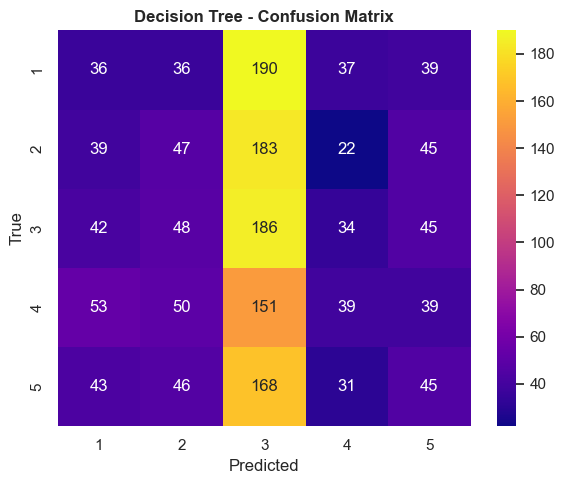

In [49]:
# Model: Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model("Decision Tree", y_test, y_pred_dt)

<Figure size 1000x600 with 0 Axes>

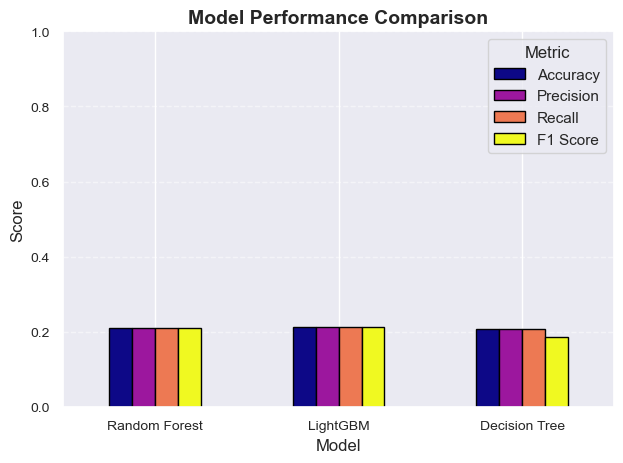

In [50]:
# Convert results to DataFrame (transpose for models as rows)
results_df = pd.DataFrame(results).T

# Create bar chart with Plasma colormap
plt.figure(figsize=(10, 6))
results_df.plot(
    kind='bar',
    colormap='plasma',
    edgecolor='black'
)

# Styling and labels
plt.title("Model Performance Comparison", fontsize=14, weight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metric', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Appendix**

## 5. **Descriptive Statistics**

In [51]:
# Summary statistics for numeric features
data.describe()


,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8467,2769.000000
mean,44.026804,2020-12-30 01:35:13.071201024,2023-06-01 11:27:36.232022784,2023-06-01 11:29:48.017833984,2.991333
min,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000
25%,31.000000,2020-07-02 00:00:00,2023-06-01 05:23:05,2023-06-01 05:54:19,2.000000
50%,44.000000,2020-12-31 00:00:00,2023-06-01 11:27:32,2023-06-01 11:27:43,3.000000
75%,57.000000,2021-07-01 00:00:00,2023-06-01 17:38:29,2023-06-01 17:14:42,4.000000
max,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000
std,15.296112,NaN,NaN,NaN,1.407016


### Prepare Features for Modeling

In [52]:
# Encode Ticket Channel
df['Ticket Channel'] = df['Ticket Channel'].astype('category')
df['Channel_Code'] = df['Ticket Channel'].cat.codes

# Create binary satisfaction label
df['Satisfaction_Level'] = df['Customer Satisfaction Rating'].apply(
    lambda x: 1 if x >= 4 else (0 if pd.notnull(x) else None)
)
df.dropna(subset=['Satisfaction_Level'], inplace=True)


### 1.1. Data Preparation

In [53]:
# 1. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Plot settings
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")


In [54]:
# 2. Load the Data
df = pd.read_csv('customer_support_tickets.csv')

# First quick look
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [55]:
# 3. Data Understanding
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

=== Random Forest Evaluation ===
Accuracy: 0.20602125147579692

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.25      0.23       338
           2       0.18      0.16      0.17       336
           3       0.20      0.24      0.22       355
           4       0.23      0.20      0.21       332
           5       0.21      0.18      0.19       333

    accuracy                           0.21      1694
   macro avg       0.21      0.21      0.20      1694
weighted avg       0.21      0.21      0.20      1694



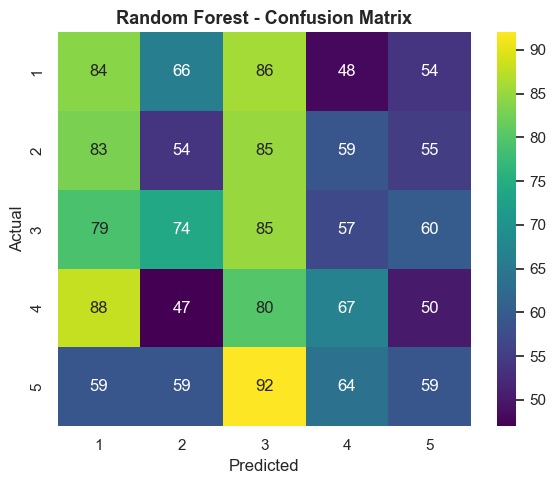

In [56]:
# Machine Learning Models - Random Forest Classifier

# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=None,         # Let trees expand fully unless otherwise specified
    random_state=42,        # Ensures reproducibility
    class_weight='balanced' # Helps if target classes are imbalanced
)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the model
print("=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title("Random Forest - Confusion Matrix", fontsize=13, weight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


We removed the random classifier from the CA because it does not learn from the data. It only makes predictions by chance and does not show any real machine learning process. Including it would not add value or demonstrate useful skills like training, evaluation, or model improvement. The goal of the CA is to build models that solve real problems, and the random classifier does not help with that.

In [57]:
# 7. Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

print("Best Parameters:", grid_rfc.best_params_)
print("Best Cross-Val Score:", grid_rfc.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Val Score: 0.20398523985239853


=== Logistic Regression ===
Accuracy: 0.21959858323494688

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       338
           2       0.00      0.00      0.00       336
           3       0.22      0.81      0.35       355
           4       0.22      0.26      0.24       332
           5       0.00      0.00      0.00       333

    accuracy                           0.22      1694
   macro avg       0.09      0.21      0.12      1694
weighted avg       0.09      0.22      0.12      1694



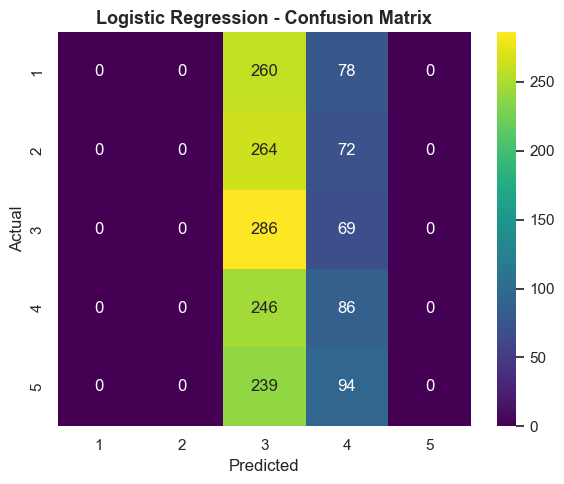

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)

# Predict
y_pred_log = logreg.predict(X_test)

# Evaluate
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("Logistic Regression - Confusion Matrix", fontsize=13, weight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


=== XGBoost Classifier ===
Accuracy: 0.2089728453364817

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.22      0.21       338
           2       0.19      0.19      0.19       336
           3       0.21      0.21      0.21       355
           4       0.21      0.23      0.22       332
           5       0.23      0.20      0.22       333

    accuracy                           0.21      1694
   macro avg       0.21      0.21      0.21      1694
weighted avg       0.21      0.21      0.21      1694



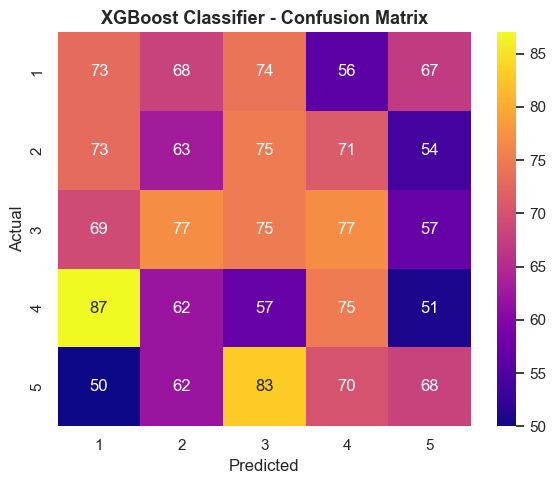

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Shift target labels to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Train the model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train_adj)

# Predict
y_pred_xgb = xgb_clf.predict(X_test)

# Shift predictions back to original label scale (1–5)
y_pred_xgb += 1

# Evaluate
print("=== XGBoost Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("XGBoost Classifier - Confusion Matrix", fontsize=13, weight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**During the project in the CA2, we tested some other models like XGBoost, Logistic Regression, and a Random Classifier, but we decided not to include them in the CA3. Here is why:**

- XGBoost is powerful, but it needed extra steps to prepare the data (changing labels to start from 0). It also took more time to train and did not give much better results than simpler models.

- Logistic Regression is easy and fast, but it did not perform well in our case. It could not capture the complex patterns in the data, and the accuracy was low.

- Random Classifier makes predictions by chance. It is useful only to compare if a real model is better than guessing. But it does not learn anything from the data, so we did not include it.

**In the end, we used Random Forest, LightGBM, and Decision Tree because they gave better results and were more useful for our problem.**